# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


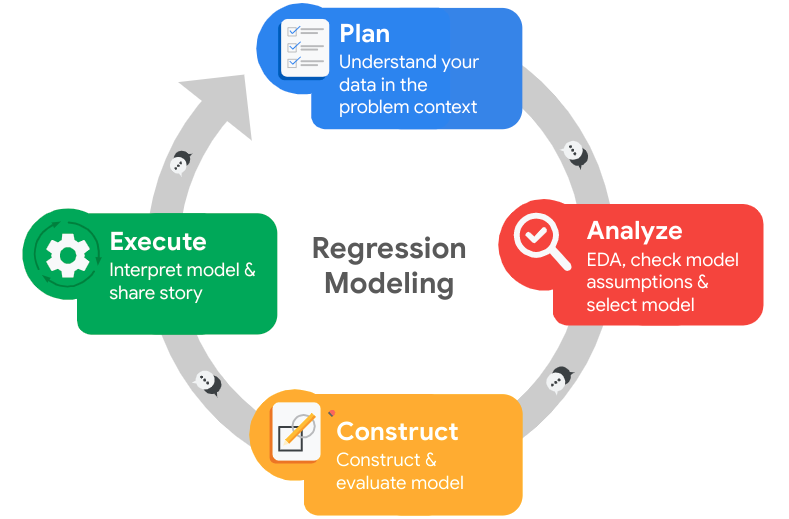

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders for this project are Salifort’s senior leadership team.

2. My goal is to design a model that can predict if an employee will leave the company. Salifort makes a big investment in recruiting, training, and upskilling its employees, so if they could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees.

3. I will perform EDA to gain some valuable insights about the dataset and see if there are relationships between key variables. I will also perform some cleaning procedures in the dataset. 

4. I will complete this stage with the help of a diversity of python libraris such as pandas, numpy, matplotlib, seaborn, sklearn and others, as well as the documentation that is available online refering to them.

5. At this point, I have no ethical consiferations.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Display all the columns 
pd.set_option('display.max_columns', None)

# Metrics and helpful functions
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import f1_score, accuracy_score, recall_score,\
precision_score, confusion_matrix, ConfusionMatrixDisplay, \
classification_report, roc_auc_score, roc_curve

from sklearn.tree import plot_tree

# Data modeling 
from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# For model saving
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 
# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'time_spend_company':'tenure',
                           'Work_accident':'work_accident',
                           'average_montly_hours':'average_monthly_hours',
                           'Department':'department'})


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates

df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()== True]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


With several continuous variables across 10 columns, it seems highly unlikely that these duplicate observations are legitimate. It is hard to believe that two employees reported the same response for every column and the fact that there are 3008 row of duplicates reinforces this. That being said, we can proceed with dropping these duplicates.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

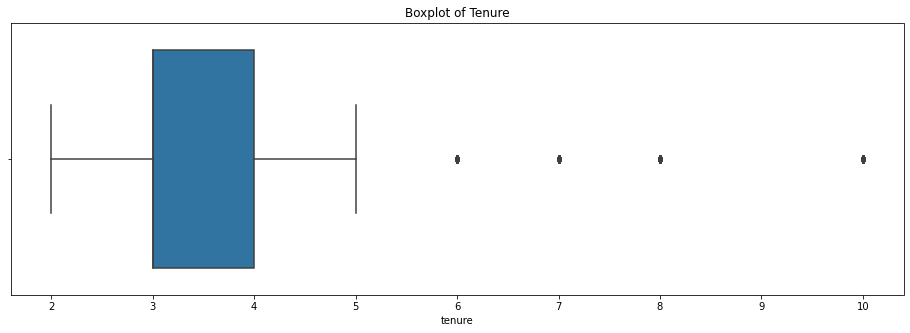

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize=(16,5))
sns.boxplot(data=df1, x='tenure')
plt.title('Boxplot of Tenure')
plt.show()

In [13]:
# Determine the number of rows containing outliers

percentile25 = df1['tenure'].quantile(0.25)
print('The 25 percentile of Tenure is: ', percentile25)

percentile75 = df1['tenure'].quantile(0.75)
print('The 75 percentile of Tenure is: ', percentile75)

iqr = percentile75 - percentile25
print('The Inter Quartile Range of Tenure is: ', iqr)

The 25 percentile of Tenure is:  3.0
The 75 percentile of Tenure is:  4.0
The Inter Quartile Range of Tenure is:  1.0


In [14]:
# Define the upper and lower limit for non-outliers
# Values below or above 3 standard deviations are considered outliers
# We can also calculate these by adding or subtracting a 1.5*IQR

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print('Upper Limit: ', upper_limit)
print('Lower Limit: ', lower_limit)

Upper Limit:  5.5
Lower Limit:  1.5


In [15]:
# Define the subset identifying the outliers
mask_outliers = (df1['tenure']>upper_limit) | (df1['tenure'] < lower_limit)

outliers = df1[mask_outliers]

print('Number of rows with outliers in Tenure: ', len(outliers))

Number of rows with outliers in Tenure:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?


1. (Explained below)
2. (Explained below) 
3. The only transformation made at this point was changing the columns name to be standardized.
4. Outliers and extreme data values can significantly impact logistic regression models. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations. EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with dataset means, medians, and other similar methods. Additionally, it can be useful to create variables by multiplying variables together or calculating the ratio between two variables.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


In [17]:
avg_satisfaction = df1.groupby('left')[['satisfaction_level']].mean()
avg_satisfaction

,satisfaction_level
left,
0,0.667365
1,0.440271


This means that the average satisfaction of the employees who stayed in the company is 0.667 and for the employees who left was 0.440. So, even for emplyees who still work for Sailfort Motors, the satisfaction is not very high.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

We can begin by examining the impact that 'number_project' and 'average_monthly_hours' have on the variable 'left' and even 'satisfaction_level'. 

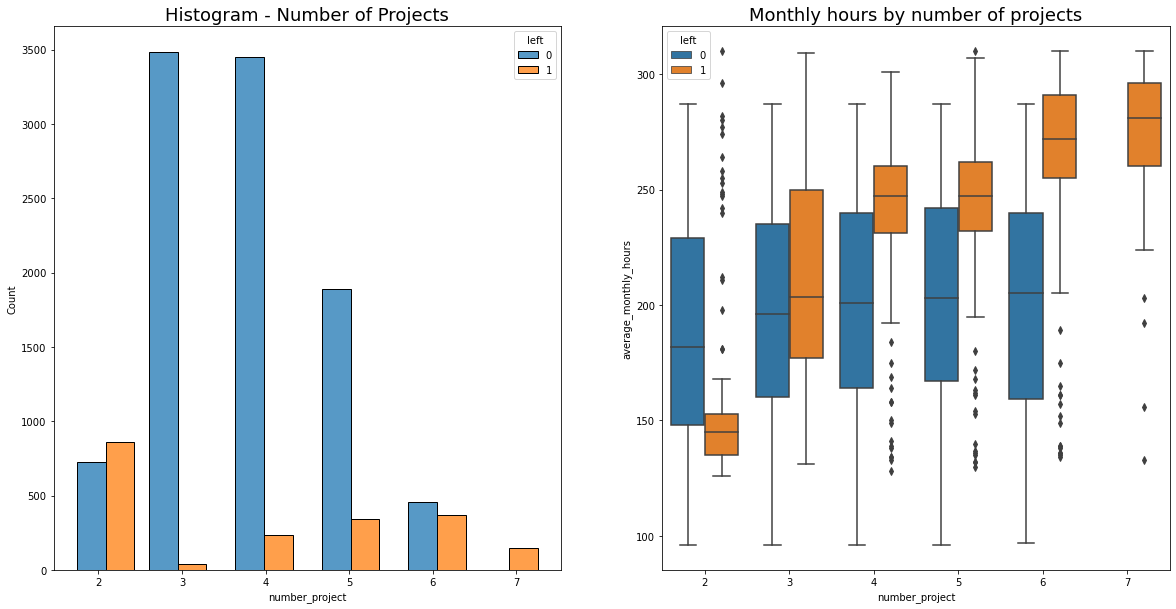

In [18]:
# Create a plot as needed
fig, axes = plt.subplots(1,2, figsize=(20,10))

# Histogram with distribution of number of projects, comparing employees who left vs who stayed 
axes[0].set_title('Histogram - Number of Projects',fontsize='18')
sns.histplot(data=df1, x='number_project',hue='left',multiple='dodge',shrink=4,ax=axes[0])

# Boxplot of average monthly hours with number of projects
sns.boxplot(data=df1, x='number_project',y='average_monthly_hours', hue='left', ax=axes[1])
axes[1].set_title('Monthly hours by number of projects', fontsize='18')
plt.show()

It is natural for people who work on more projects to have a superior monthly hour average. From the above plots we can confirm that it appears to be the case here. We can conclude the following:

1. The number of hours of work tends to increase with the number of projects.
2. There seems to be an optimal number of projects(3-4) that keeps employees satisfied. 
3. If we assume a work week of 40 hours (5days * 8hours/day) and 3 weeks of annual vacation, the average number of hours per month should be = 49 weeks * 40 hours/week / 12 months = 163.3 hours/month
4. Everyone with 7 projects left the company, which seems reasonable since the interquartile ranges of this group and those who left with 6 projects was between 250-295 hours/month, which is clearly above any other group. When compared to the supposed 163.3 hours that it should be, it is even more evident.
5. There are 2 types of groups: (a) Those who worked less than others with the same number of projects, having been possibly fired or have already given notice of leaving and are therefore assigned fewer hours and projects. And (b) those who worked much more, which seems reasonable to think the quit for another job.

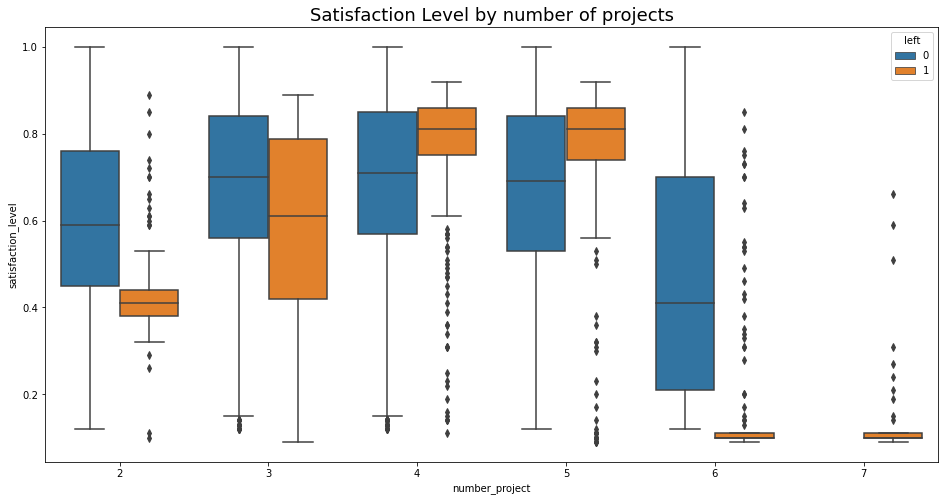

In [19]:
# Create a plot as needed
plt.figure(figsize=(16,8))
sns.boxplot(data=df1, x='number_project',y='satisfaction_level',hue='left')
plt.title('Satisfaction Level by number of projects', fontsize='18')
plt.show()

The boxplot above confirms once again what we concluded: that the more the projects, the less the satisfaction of the employees. Another important thing we can see is that the satisfaction levels of employees with 4-5 projects who left was similar or sligthly higher than those who stayed with the same number of projects (this can mean they left because they got better offers and not necessarely because of insatisfaction).

In [20]:
df1[df1['number_project']==6]['left'].value_counts()

0    455
1    371
Name: left, dtype: int64

In [21]:
# To confirm if every employee with 7 projects left
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

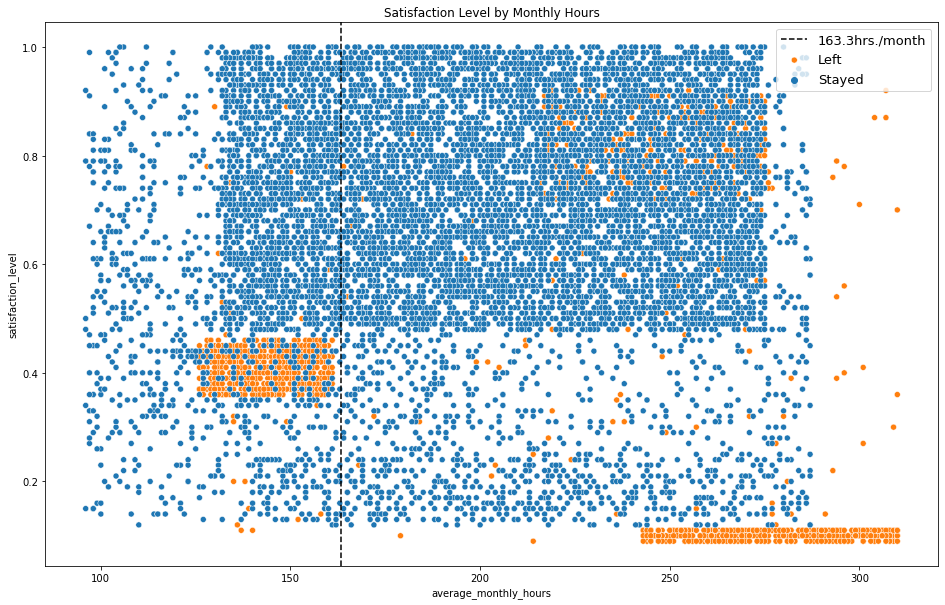

In [22]:
# Create a plot as needed
plt.figure(figsize=(16,10))
sns.scatterplot(data=df1,x='average_monthly_hours',y='satisfaction_level',hue='left')
plt.axvline(x=163.3,color='black', label='163.3 h/month' ,ls='--')
plt.title('Satisfaction Level by Monthly Hours')
plt.legend(labels=['163.3hrs./month','Left','Stayed'],fontsize='13')
plt.show()

From the scatterplot above, we can see that a sizeable amount of employees work more than 40hours/week. We can see the group of people that had working hours ranging from 240 to 320h with satisfaction below 0.2. We can identify the group of employees who worked less hours than their peers with the same number of projects. And there is a group of employees who worked ~ 210-275 hours per month, but still had high satisfaction levels(~0.7-0.9) as we have seen in the previous boxplot.

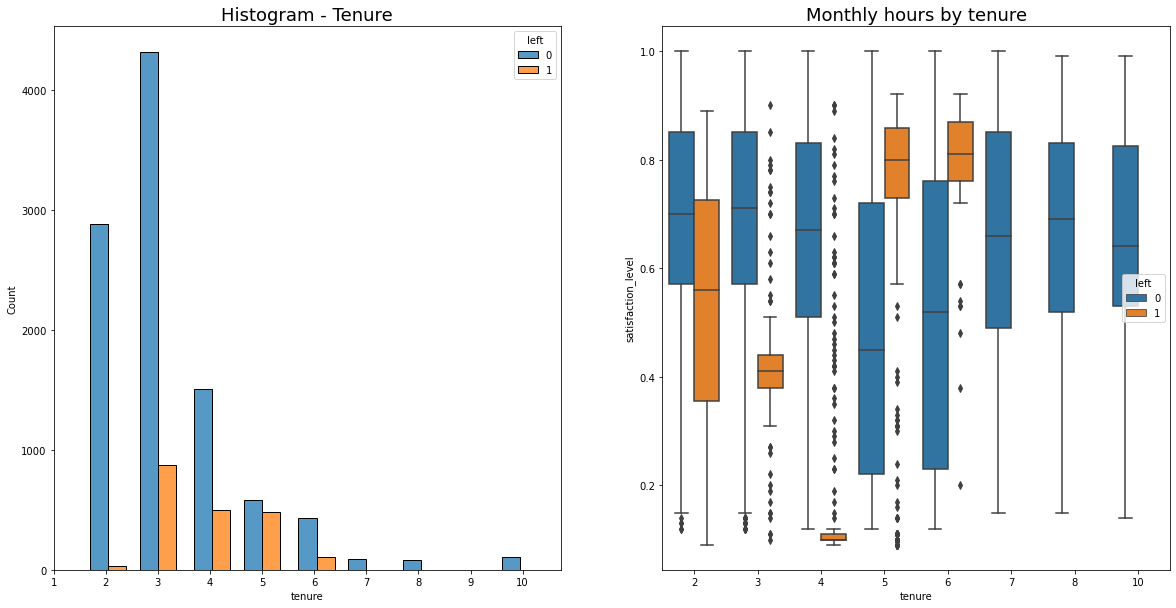

In [23]:
# Create a plot as needed
fig, axes = plt.subplots(1,2, figsize=(20,10))

# Histogram with distribution of number of projects, comparing employees who left vs who stayed 
axes[0].set_title('Histogram - Tenure',fontsize='18')
sns.histplot(data=df1, x='tenure',hue='left',multiple='dodge',shrink=8,ax=axes[0])
axes[0].set_xticks(range(1,11,1))

# Boxplot of average monthly hours with number of projects
sns.boxplot(data=df1, x='tenure',y='satisfaction_level', hue='left', ax=axes[1])
axes[1].set_title('Monthly hours by tenure', fontsize='18')
plt.show()

The histogram reveals that there are relatively few longer-tenured employees, possibly being the higher-ranking, with better salaries. Most of the employees left in the 3.5 year range. The biggest amount of employees still in the company are in their 3rd year.

From the boxplot, we can see that in the 4th year the employees who left had an unusually low satisfaction level, which may be worth investigating. The longest-tenured employees didn't leave and their satisfaction is relatively high. Employes who left from the 5th and 6th years had a pretty high satisfaction level, which is worth some extra investigation.

Now let's explore relationships between salary and tenure. We can check if the high-tenured employees all get well-paid or not.

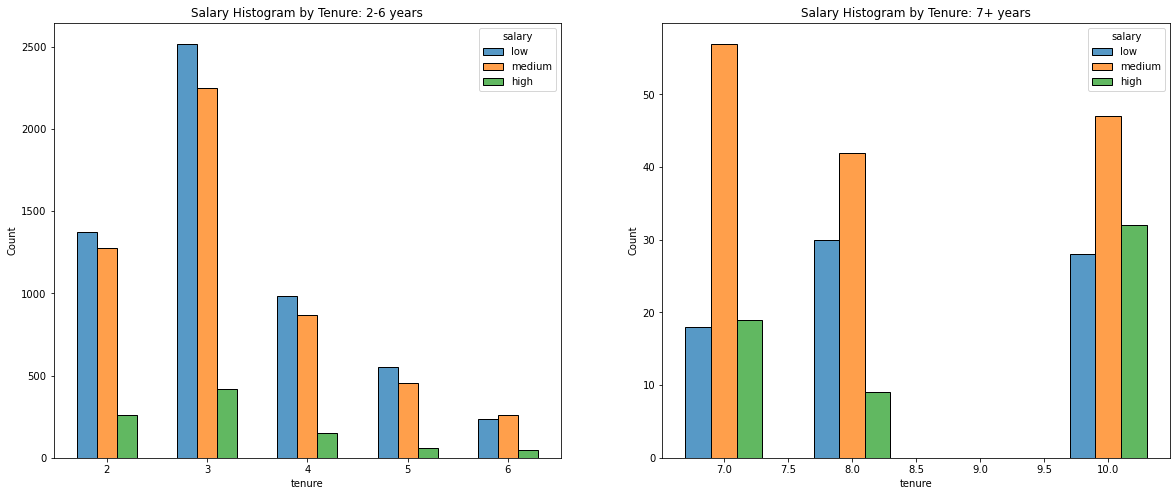

In [24]:
# Salary histogram (2-6 years)
fig, axes = plt.subplots(1,2,figsize=(20,8))

tenure_short = df1[df1['tenure']<7]
sns.histplot(data=tenure_short, x='tenure',hue='salary',multiple='dodge',discrete=1,shrink=0.6,ax=axes[0])
axes[0].set_title('Salary Histogram by Tenure: 2-6 years')

# Salary Histogram (7+ years)
tenure_long = df1[df1['tenure']>=7]
sns.histplot(data=tenure_long, x='tenure',hue='salary',hue_order=['low', 'medium', 'high'],multiple='dodge',discrete=1, shrink=0.6,ax=axes[1])
axes[1].set_title('Salary Histogram by Tenure: 7+ years')

plt.show()

Overall the distribution seems normal. In the first years there is a bigger amount of employees in the low-medium salary range, with the count of high salary employees being relatively small throughout the tenures, only being more signifficant in the 10th year(also because there are a lot less employees).

Since we're talking about salaries, let's check if someone got a promotion.

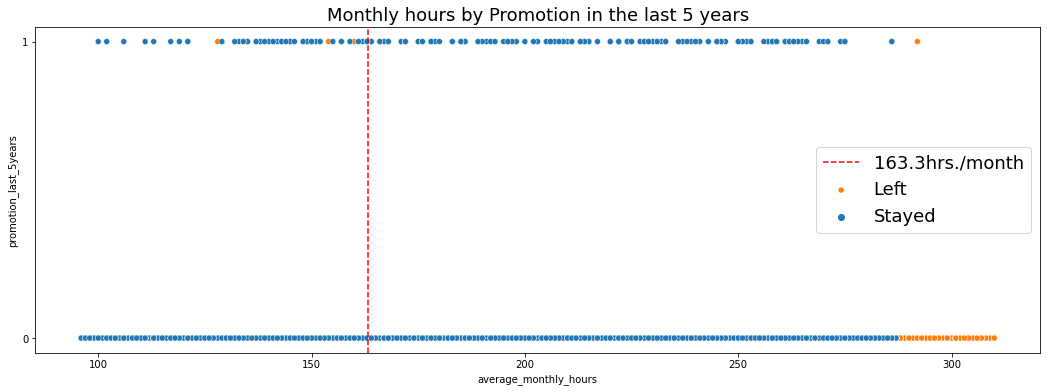

In [25]:
# Scatter plot to exame relationship between 'average_monthly_hours' and 'promotion_last_5years'

plt.figure(figsize=(18,6))
sns.scatterplot(data=df1,x='average_monthly_hours',y='promotion_last_5years',hue='left')
plt.title('Monthly hours by Promotion in the last 5 years',fontsize='18')
plt.yticks(range(0,2,1)) # since 'promotion_last_5years' is binary
plt.axvline(x=163.3,color='red',ls='--')
plt.legend(labels=['163.3hrs./month','Left','Stayed'],fontsize='18')
plt.show()

From the plot above, we can observe that a lot of employees with a large amount of working hours that didn't get a promotion in the lastt 5 years left the company. Maybe that's one of the main reasons for their insatisfaction. We can also see that the amount of employees that got a promotio in the last 5 years is much less than the amount that didn't get one.

Let's check the actual percentages of employees that received or not a promotion and stayed/left the company.

In [26]:
df_promo = df1[df1['promotion_last_5years']==1]
df_no_promo = df1[df1['promotion_last_5years']==0]
df_left = df1[df1['left']==1]
df_stayed = df1[df1['left']==0]

df_promo_stay_percent = (len(df_promo[df_promo['left']==0])/df_promo.shape[0])*100
print('Percentage of employees who were promoted (last 5 years) and stayed: {:.3f}%'.format(df_promo_stay_percent))
print('')

df_no_promo_stay_percent = (len(df_no_promo[df_no_promo['left']==0])/df_no_promo.shape[0])*100
print('Percentage of employees who were NOT promoted (last 5 years) and stayed: {:.3f}%'.format(df_no_promo_stay_percent))
print('')

df_promo_left_percent = (len(df_promo[df_promo['left']==1])/df_promo.shape[0])*100
print('Percentage of employees who were promoted (last 5 years) and left: {:.3f}%'.format(df_promo_left_percent))
print('')

df_no_promo_left_percent = (len(df_no_promo[df_no_promo['left']==1])/df_no_promo.shape[0])*100
print('Percentage of employees who were NOT promoted (last 5 years) and left: {:.3f}%'.format(df_no_promo_left_percent))


Percentage of employees who were promoted (last 5 years) and stayed: 96.059%

Percentage of employees who were NOT promoted (last 5 years) and stayed: 83.178%

Percentage of employees who were promoted (last 5 years) and left: 3.941%

Percentage of employees who were NOT promoted (last 5 years) and left: 16.822%


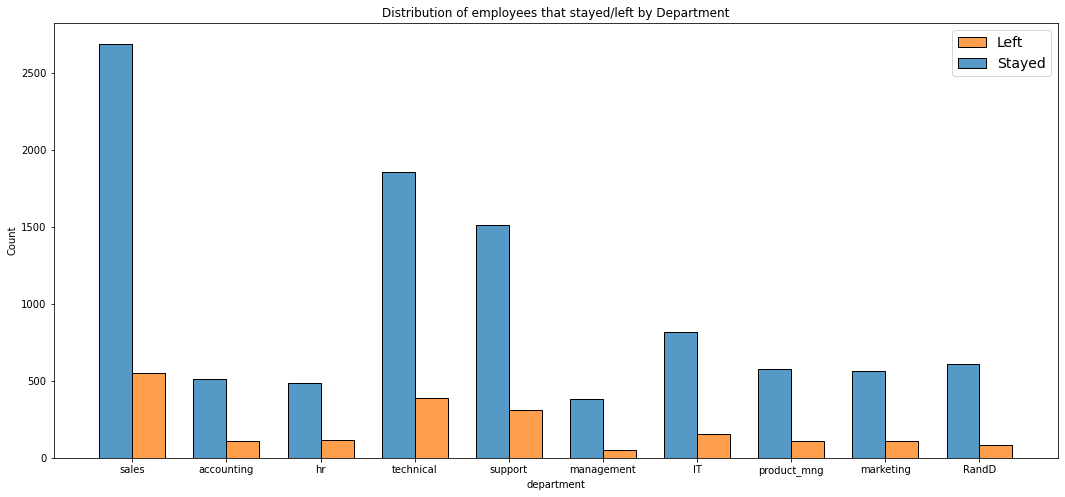

In [27]:
plt.figure(figsize=(18,8))

# Histogram of the distribution of employees for every department
sns.histplot(data=df1, x='department',hue='left',multiple='dodge',shrink=0.7)
plt.title('Distribution of employees that stayed/left by Department')
plt.legend(labels=['Left','Stayed'],fontsize='14')
plt.show()

The proportion of employees that left to those who stayed doesn't seem to differ much throughout the departments. We can also check these values:

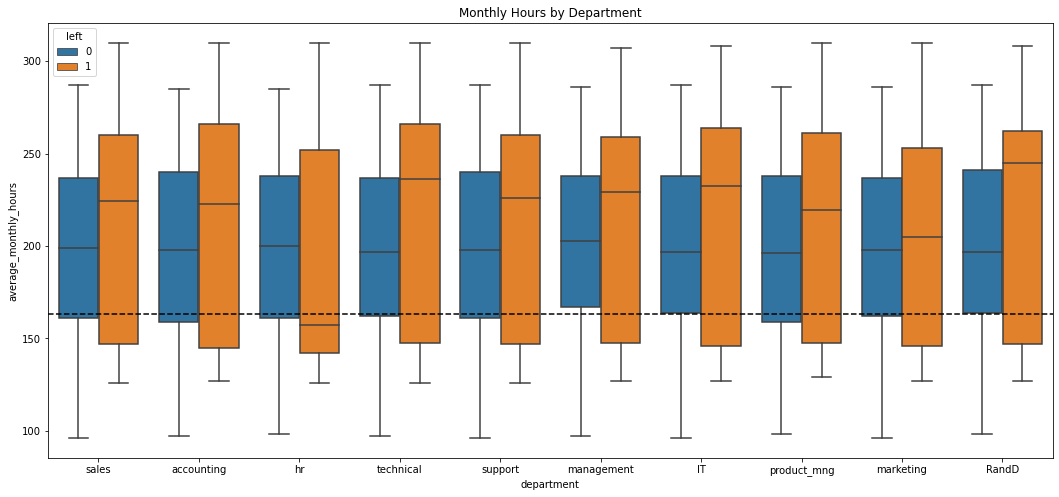

In [28]:
plt.figure(figsize=(18,8))

# Histogram of the monthly hours for every department
sns.boxplot(data=df1, x='department',y='average_monthly_hours',hue='left')
plt.title('Monthly Hours by Department')
plt.axhline(y=163.3,color='black',ls='--')

plt.show()

In general the employees that left the company were working more hours than the one who stayed and who were part of the same department.

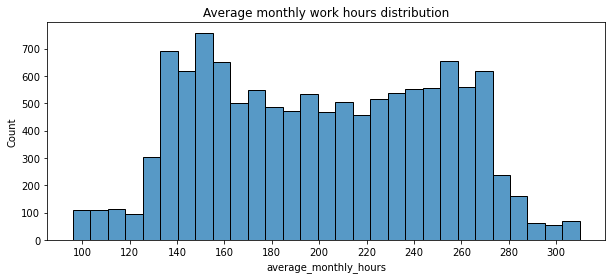

In [29]:
# we can visualize the distibution of average monhtly working hours
plt.figure(figsize=(10,4))
sns.histplot(data=df1, x='average_monthly_hours')
plt.title('Average monthly work hours distribution')
plt.xticks(range(100,320,20))
plt.show()

Now that we investigated the dataset and made some visualizations, we can see the correlation between key variables in order to understand if there is some relationship that we are missing and not exploring.

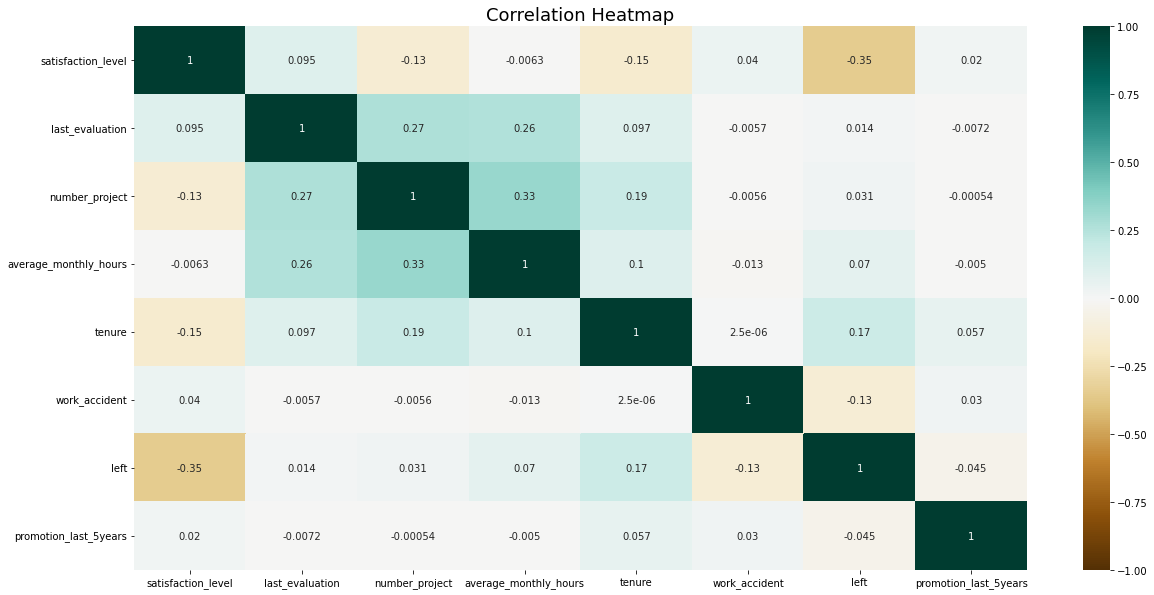

In [30]:
# Correlation heatmap
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df1.corr(),annot=True,vmin=-1,vmax=1,cmap='BrBG')
heatmap.set_title('Correlation Heatmap',fontsize='18')
plt.show()

I was expecting to see a bigger correlation between some variables. Nevertheless, we can confirm that the number of projects and monthly hours have a positive correlation. We can also observe that the monthly hours and number of projects are positively correlated with the last evaluation, which might mean that a bigger amount of work benefits the evaluation score. Lastly, we can also observe that the employees who leave are negatively coreelated with satisfaction level, which makes sense.

### Insights

It seems that employees are leaving the company due to a large amount of work hours, many projects and probably due to the lack of promotions. This might be the result of poor management, because it appears that a lot of the employees who left were burned out and might have become increasingly tired of the company's inaction towards creating a better workplace and rewarding them for their hard work. The employes that spend more than 6 years at the company, tend to stay.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to build a model that can predict whether an employee leaves the company, which is a categorical outcome(0-stayed, 1-left). This task is a binary classification. 

### Identify the types of models most appropriate for this task.

Since the variable we want to predic is categorical, we can either buidl a Logistic Regression Model or a Tree-based Model. In this case, we will do both and compare the results to decide which one is better.

### Modeling

Add as many cells as you need to conduct the modeling process.

## A : Logistic Regression Model

Before splitting the data into train, validation and test sets, we need to encode the non-numeric variables : 'salary' and 'department'. The difference between these two variables is that 'salary' is hierarquical, so instead of dummying, we can convert to number 0-2.

In [31]:
# Make a copy of the datafram so we can still use the other one if needed
df_numeric = df1.copy()

# Encode 'salary' to ordinal numeric category
# Low(0), Medium(1), High(2)
df_numeric['salary'] = (
    df_numeric['salary'].astype('category').cat.set_categories(['low','medium','high'])
    .cat.codes)

# Dummy encode 'department'
df_numeric = pd.get_dummies(df_numeric,drop_first=False)

df_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


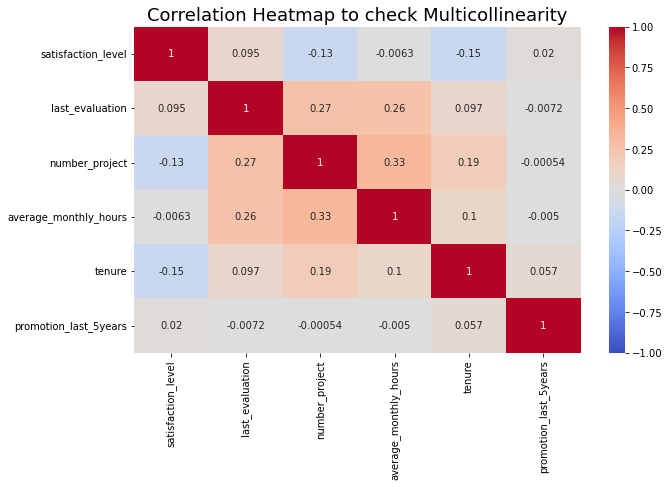

In [32]:
plt.figure(figsize=(10,6))
df_num_corr = df_numeric[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure','promotion_last_5years']]
sns.heatmap(df_num_corr.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap to check Multicollinearity',fontsize='18')
plt.show()

No severe multicollinearity is observed with the largest value of correlation being 0.33, which is relatively low.

Since logistic regression is sensitive to outliers, it would be wise to remove the outliers that were previously identified in the 'tenure' column. 

In [33]:
# Save to new dataframe for Logistic regression the rows with no outliers
df_logistic_regression = df_numeric[(df_numeric['tenure']>=lower_limit)&(df_numeric['tenure']<=upper_limit)]

df_logistic_regression.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Isolate the outcome variable and the predictor variables:

In [34]:
# Isolate the Outcome variable
y = df_logistic_regression['left']

# Select the features that will be predictor variables to use in the model
X = df_logistic_regression.drop('left',axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Since we don't have available huge amounts of data, we will divide the dataset in just train and test sets (75%/25%). We have to put stratify=y because we have an unbalanced dataset(83%-17% split)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [36]:
%%time
# Contruction of the Logistic Regression Model 
lr_clf = LogisticRegression(random_state=42,max_iter=500)

# Fit the model
lr_clf.fit(X_train,y_train)

CPU times: user 48 s, sys: 1min 3s, total: 1min 51s
Wall time: 55.6 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Generate predictions on X_test
y_preds = lr_clf.predict(X_test)

Now let's create a confusion matrix to visualize the results for the Logistic Regression Model:

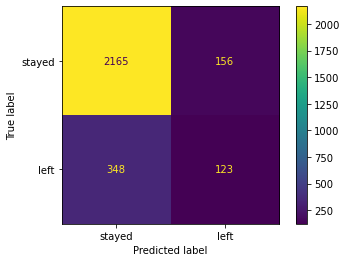

In [38]:
# create the confusion matrix
lr_cm = confusion_matrix(y_test,y_preds, labels=lr_clf.classes_)

# create the display of the matrix
lr_cm_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=['stayed','left'])

# remove the scientific notation
lr_cm_disp.plot(values_format='')

plt.show()

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

Let's see the classification report that includes the metrics to evaluate the model.

In [39]:
# create classification report for LogReg model
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



The 'weighted avg' is what interests us. This report shows that the logistic regression model obtained a 79% precision, a recall of 82% and an f1-score of 80%.

To find the accuracy, we can simply code the following. (it's ~82%)

In [40]:
lr_clf.score(X_test,y_test)

0.8194842406876791

In [41]:
accuracy_score(y_test,y_preds)

0.8194842406876791

We can create a dataframe with the result metrics from the Logistic Regression Model. Note that we need to put average='weighted' otherwise the metrics would be wrong. This dataframe can later be joined with the results from other models in order to compare.

In [42]:
table_lr =pd.DataFrame()
table_lr = pd.DataFrame({'model':'Logistic Regression',
                        'precision':[precision_score(y_test,y_preds,average='weighted')],
                        'recall':[recall_score(y_test,y_preds,average='weighted')],
                        'F1':[f1_score(y_test,y_preds,average='weighted')],
                        'accuracy':[accuracy_score(y_test,y_preds)]},
                       )
table_lr

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.790556,0.819484,0.799963,0.819484


## B: Tree-based Model

Now let's implement a Decision Tree and Random Forest model.

In [43]:
# Isolate the outcome variable
y = df_numeric['left']

# Select the predictor features
X = df_numeric.drop('left',axis=1)

In [44]:
# Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Decision tree - round 1 

In [45]:
# Instantiate the model
tree = DecisionTreeClassifier(random_state=42)

# Assign the dictionary of hyperparameters for tuning
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign the dictionary of scoring metrics
scoring = {'precision','recall','f1','accuracy','roc_auc'}

# Grid search
tree1_cv = GridSearchCV(tree, cv_params, scoring=scoring, cv=4,refit='roc_auc')

In [46]:
%%time
#Fit the decision tree model to the training data

tree1_cv.fit(X_train,y_train)

CPU times: user 2.86 s, sys: 98.7 ms, total: 2.96 s
Wall time: 2.96 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

Let's check the optimal parameters for the decision tree and the best score(in this case the best AUC score that we selected in refit='roc_auc').

In [47]:
tree1_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [48]:
tree1_cv.best_score_

0.9758952535925409

This is a very strong AUC score, which shows that this model can predict employees who will leave the company almost perfectly.

We can now write a function that will help extract all the scores from the grid search.

In [49]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output model_object: 
    a fit GridSearchCV object metric (string): precision, recall, f1, or accuracy
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds '''
 # Create dictionary that maps input metric to actual metric name in GridSea 
    metric_dict = {'precision': 'mean_test_precision','recall': 'mean_test_recall',
                   'f1': 'mean_test_f1','accuracy': 'mean_test_accuracy','auc':'mean_test_roc_auc'
                  }
 # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
 # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
                                             
 # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    auc = best_estimator_results.mean_test_roc_auc
 # Create table of results
    table = pd.DataFrame({'model': [model_name],'precision': [precision],
                          'recall': [recall],'F1': [f1],'accuracy': [accuracy],
                          'auc': [auc]
                         },)
    return table

In [50]:
tree1_cv_results = make_results('Decision Tree CV', tree1_cv, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.966878,0.918288,0.941941,0.981208,0.975895


The decision tree model appears to have very good scores.

Now we will build a Random forest model, which isn't vulnerable to overfitting and might perform even better.

### Random Forest - round 1 

In [54]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Define a dictionary of scoring metrics to capture
scoring = {'precision','recall','f1','accuracy','roc_auc'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Let's fit the random forest model to the training data.

In [55]:
%%time
rf_cv.fit(X_train,y_train)

CPU times: user 9min 25s, sys: 4.26 s, total: 9min 29s
Wall time: 9min 29s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

Specify the path where we will save the model.

In [56]:
# Define a path to the folder where the model will be saved
path = '/home/jovyan/work/'

Define the helper functions to pickle and read the model

In [57]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [58]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [59]:
# Write pickle
write_pickle(path, rf_cv, 'results_rf_cv')

In [60]:
# Read pickle
rf_cv = read_pickle(path, 'results_rf_cv')

Now we can check the optimal parameters for the model and the best score ( in this case is AUC )

In [62]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [63]:
rf_cv.best_score_

0.9819627407970256

Let's get the best scores from the Random Forest model

In [64]:
rf_cv_results = make_results('Random Forest CV', rf_cv, 'auc')
rf_cv_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest CV,0.946285,0.918956,0.932377,0.977872,0.981963


### XGBoost - round 1 

In [65]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic',random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [7, 9],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.01],
              'n_estimators': [100],
              'subsample': [1.0],
              'colsample_bytree': [1.0]
              }

# Define a dictionary of scoring metrics to capture
scoring = {'precision','recall','f1','accuracy','roc_auc'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Let's fit the XGBoost model to the training data.

In [66]:
%%time

xgb_cv.fit(X_train,y_train)

CPU times: user 44.7 s, sys: 327 ms, total: 45.1 s
Wall time: 22.8 s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [1.0],
                         'learning_rate': [0.1, 0.01], 'ma

In [67]:
# Write pickle
write_pickle(path, xgb_cv, 'results_xgb_cv')

In [68]:
# Read pickle
xgb_cv = read_pickle(path, 'results_xgb_cv')

Now we can check the optimal parameters for the model and the best score ( in this case is AUC )

In [69]:
xgb_cv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 1.0}

In [70]:
xgb_cv.best_score_

0.9847754450354356

Let's get the best scores from the XGBoost model

In [71]:
xgb_cv_results = make_results('XGBoost CV', xgb_cv, 'auc')
xgb_cv_results

,model,precision,recall,F1,accuracy,auc
0,XGBoost CV,0.969475,0.911585,0.939584,0.98054,0.984775


## Feature Engineering

All the models above seem very strong, which makes me suspicious that something might not be right. There is a chance that there is some data leakage occurring, which occurs when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. This can lead to an unrealistic score that will not be replicated in production.

In this new round of tree-based models, we will incorporate feature engineering to improve the models and thus, we will not use all the variables as predictors.

It's likely that the company won't have satisfaction levels reported for all of its employees, so we can drop the column.

In [73]:
# Drop 'satsifaction_level' and save to new dataframe
df2 = df_numeric.copy()
df2 = df2.drop('satisfaction_level',axis=1)

df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


It's also possible that the average_monthly_hours column is a source of some data leakage, because if there are some employees that have already decided to leave the company, they might have been identified as people who will be fired/dismissed, so they will be expected to work less hours.

So, we can create a new feature that simply divides the dataset into two categories: the ones who work "normal" hours and the ones who overwork. 

In [74]:
print('Max hours:', df2['average_monthly_hours'].max())
print('Min hours:', df2['average_monthly_hours'].min())

Max hours: 310
Min hours: 96


We defined previously that the average monthly hours should be around 163.3 hours. We can accept that it could be a little more, but not by much because more than 8 hrs./day will decrease productivity. Let's define 170hrs.

In [76]:
# Create 'overworked' column
df2['overworked'] = df2['average_monthly_hours']
df2['overworked'] = (df2['overworked']> 170).astype(int)

df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [77]:
# Let's drop 'average_monthly_hours' from the dataframe
df2 = df2.drop('average_monthly_hours', axis=1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Isolate the features and target variable and split the data into train and test sets.

In [78]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [79]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Decision Tree - round 2 ( after feature engineering)

In [82]:
# Instantiate model
tree2 = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'precision', 'recall', 'f1','accuracy' ,'roc_auc'}

# Instantiate GridSearch
tree2_cv = GridSearchCV(tree2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [83]:
%%time
tree2_cv.fit(X_train,y_train)

CPU times: user 2.32 s, sys: 2.44 ms, total: 2.33 s
Wall time: 2.33 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [84]:
tree2_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [85]:
tree2_cv.best_score_

0.9559841244808917

In [86]:
tree2_cv_results = make_results('Decision Tree 2 CV', tree2_cv, 'auc')
tree2_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree 2 CV,0.833518,0.894851,0.862481,0.952407,0.955984


The model performs well, but with lower scores as we antecipated due to having less features.

### Random Forest - round 2 ( after feature engineering)

In [87]:
# Instantiate model
rf2 = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'precision', 'recall', 'f1','accuracy', 'roc_auc'}

# Instantiate GridSearch
rf2_cv = GridSearchCV(rf2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [88]:
%%time
rf2_cv.fit(X_train,y_train)

CPU times: user 7min 30s, sys: 1.33 s, total: 7min 31s
Wall time: 7min 32s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [89]:
# Write pickle
write_pickle(path, rf2_cv, 'results_rf2_cv')

In [90]:
# Read in pickle
rf2_cv = read_pickle(path, 'results_rf2_cv')

In [91]:
# Check the optimal parameters
rf2_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [92]:
# Check the best score (AUC in this case because refit='roc_auc')
rf2_cv.best_score_

0.9673955613539591

In [93]:
rf2_cv_results = make_results('Random Forest 2 CV', rf2_cv, 'auc')
rf2_cv_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest 2 CV,0.857114,0.883443,0.869925,0.956187,0.967396


### XGBoost - round 2 ( after feature engineering)

In [94]:
# Instantiate the XGBoost classifier
xgb2 = XGBClassifier(objective='binary:logistic',random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [7, 9],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.01],
              'n_estimators': [100],
              'subsample': [1.0],
              'colsample_bytree': [1.0]
              }

# Define a dictionary of scoring metrics to capture
scoring = {'precision','recall','f1','accuracy','roc_auc'}

# Instantiate the GridSearchCV object
xgb2_cv = GridSearchCV(xgb2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [95]:
%%time

xgb2_cv.fit(X_train,y_train)

CPU times: user 42.2 s, sys: 449 ms, total: 42.7 s
Wall time: 21.5 s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [1.0],
                         'learning_rate': [0.1, 0.01], 'ma

In [96]:
# Write pickle
write_pickle(path, xgb2_cv, 'results_xgb2_cv')

In [97]:
# Read pickle
xgb2_cv = read_pickle(path, 'results_xgb2_cv')

In [98]:
xgb2_cv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 1.0}

In [100]:
xgb2_cv.best_score_

0.9723781126196519

In [101]:
xgb2_cv_results = make_results('XGBoost 2 CV', xgb2_cv, 'auc')
xgb2_cv_results

,model,precision,recall,F1,accuracy,auc
0,XGBoost 2 CV,0.907023,0.872068,0.888994,0.963861,0.972378


## Champion Model

Let's start by showing the table with all the results, so that we can compare the metrics for every model, in order to choose the champion.

In [102]:
# Define a list with all the results
results_combo = [table_lr,tree1_cv_results,rf_cv_results,xgb_cv_results,tree2_cv_results,rf2_cv_results,xgb2_cv_results]

# Build the table (dataframe) with all the results
results_table = pd.concat(results_combo,axis=0)
results_table

,model,precision,recall,F1,accuracy,auc
0,Logistic Regression,0.790556,0.819484,0.799963,0.819484,NaN
0,Decision Tree CV,0.966878,0.918288,0.941941,0.981208,0.975895
0,Random Forest CV,0.946285,0.918956,0.932377,0.977872,0.981963
0,XGBoost CV,0.969475,0.911585,0.939584,0.980540,0.984775
0,Decision Tree 2 CV,0.833518,0.894851,0.862481,0.952407,0.955984
0,Random Forest 2 CV,0.857114,0.883443,0.869925,0.956187,0.967396
0,XGBoost 2 CV,0.907023,0.872068,0.888994,0.963861,0.972378


We will only choose between the logistic regression model and the tree-based models developed after the feature engineering. That being said, if we sort the models by AUC score, there is a clear winner: the XGBoost 2 CV model with an AUC of 97,72%.

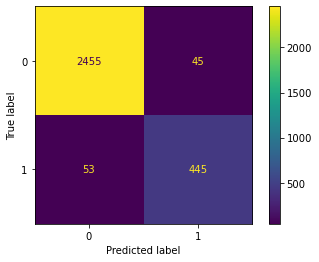

In [114]:
# Generate array of values for confusion matrix
y_pred = xgb2_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=xgb2_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb2_cv.classes_)
disp.plot(values_format='')
plt.show()

The model predicts more false negatives than false positives, which means that some employees may not be identified as at risk of quitting or getting fired, when that's actually the case.It is still a strong model.

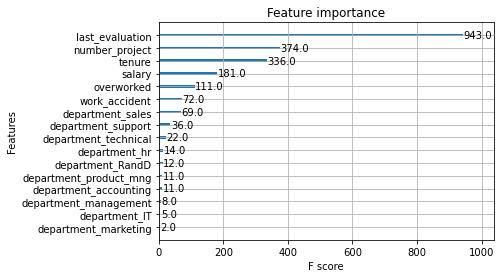

In [120]:
plot_importance(xgb2_cv.best_estimator_);

In the champion model, the features 'last_evaluation', 'number_project','tenure','salary' and 'overworked' have the highest importance. These are the most helpful variables in predicting the ooutcome variable, 'left'. 

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

**Tree-based Machine Learning**

* ***Decision Tree:***
After conducting feature engineering, the decision tree model achieved AUC of 95.6%, precision of 83.4%, recall of 89.5%, f1-score of 86.2%, and accuracy of 95.2%, on the test set. 

* ***Random Forest:***
The random forest modestly outperformed the decision tree model. It achieved AUC of 96.7%, precision of 85.7%, recall of 88.3%, f1-score of 87.0%, and accuracy of 95.6%, on the test set. 

* ***XGBoost:***
The XGBoost model was the CHAMPION model, and slightly outperformed the other tree-based models. It achieved AUC of 97.2%, precision of 90.7%, recall of 87.2%, f1-score of 88.9%, and accuracy of 96.4%, on the test set. 

### Conclusion, Recommendations, Next Steps

The extensive analysis of the dataset and development of the models, as well as the feature importances extracted from them confirm that employees at the company are overworked and the number of projects they have largely influences their decision to leave the company.

A great portion of the employees that worked on average more than 240hrs/month were very insatisfied. The fact that so many employees are working so many hours suggests bad management. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Define a threshold of the number of projects that employees can work on (maybe 4 should be the maximum).
* Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Promotions could become annualy based on performance. This will keep employees more determined to work better and more satisfied in case they get promoted.
* Either reward employees for working longer hours, or don't require them to do so. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. This will help understand what is not working in the current system.
* High evaluation shouldn't be based only on amount of working hours but also on the quality of the job performed
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

The dataset is unbalanced, meaning that we have much less data on the employees who left the company compared with the one that stayed. If we can get access to more data regarding this aspect, we could train the model again. 

Another issue might be with the 'salary' feature because it only has 3 categories: low, medium, high. If we got the actual salaries, maybe we could draw better conclusions because, as we know, salary is one of the most important things that leads to people switching jobs.

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

The dataset is unbalanced, meaning that we have much less data on the employees who left the company compared with the one that stayed. If we can get access to more data regarding this aspect, we could train the model again. 

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 